# This notebook to build a sentiment analysis for Movies dataset.

### Import necessary libraries

In [185]:
import pandas as pd # for reading csv file
import re # for preprocessing text
import string # for preprocessing text
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words
from sklearn.model_selection import train_test_split  # for splitting data
from sklearn.naive_bayes import GaussianNB # to bulid classifier model
from sklearn.preprocessing import LabelEncoder # to convert classes to number 
from sklearn.metrics import accuracy_score # to calculate accuracy
import nltk # for processing texts
from nltk.corpus import stopwords # list of stop words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# douwnload data
!wget https://raw.githubusercontent.com/ZarahShibli/sentiment_analysis/data/bbn_shared_2.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
--2020-03-05 13:42:25--  https://raw.githubusercontent.com/ZarahShibli/sentiment_analysis/data/bbn_shared-2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-03-05 13:42:25 ERROR 404: Not Found.



## Model Architecture

![Model steps](https://user-images.githubusercontent.com/42017072/75925841-7890d480-5e7a-11ea-8311-576a5ec34e20.png)


## Read data
[BBN Blog Posts Sentiment Corpus](https://saifmohammad.com/WebPages/ArabicSA.html) contains A random subset of 1200 sentences chosen from the BBN Arabic-Dialect–English Parallel Text.

In [186]:
data = pd.read_csv(r"bbn_shared_2.csv")
data.head()

,Arabic_text,ar:manual_sentiment,ar:manual_confidence
0,خصوصا الشركات لأنو رح تكون هدف سهل لمحاولت اخت...,Negative,0.8231
1,ألفين مبروك أخي تميم يعني والله بتستاهل فعلاً ...,Positive,1.0000
2,يآأاساتر مين هووون بشوووف,Negative,0.7474
3,يعني اذا كنت انا صاحب شركة كمان ما رح اخد غير ...,Positive,0.4961
4,وحتى بالعدوان كانوا شركاء في مجزرة مروحين ...,Negative,0.9124


In [187]:
data = data.drop(columns=['ar:manual_confidence']) # remove last column 
data = data.rename(columns={"Arabic_text": "text", "ar:manual_sentiment": "sentiment"}) # rename columns name
data

,text,sentiment
0,خصوصا الشركات لأنو رح تكون هدف سهل لمحاولت اخت...,Negative
1,ألفين مبروك أخي تميم يعني والله بتستاهل فعلاً ...,Positive
2,يآأاساتر مين هووون بشوووف,Negative
3,يعني اذا كنت انا صاحب شركة كمان ما رح اخد غير ...,Positive
4,وحتى بالعدوان كانوا شركاء في مجزرة مروحين ...,Negative
...,...,...
1195,مما اضطرني الى حرقهاتصوروا ان اللهب ارتفع اعلى...,Negative
1196,ومأخوذين بتصرفات خارجية مبهرة ملهاش علاقة بالم...,Negative
1197,على هالطريق نفسو كنت مبارحة ومشيت ورا مرسيدس ف...,Neutral
1198,وبيعملو شي مفيد لانو وزيادة علييهم الحيوانات ..,Negative


In [188]:
# number of samples in dataset
data.shape

(1200, 2)

In [189]:
# count of each type 
data['sentiment'].value_counts()

Negative    575
Positive    498
Neutral     126
Both          1
Name: sentiment, dtype: int64

In [190]:
# counts of missing values in dataset 
data.isna().sum()

text         0
sentiment    0
dtype: int64

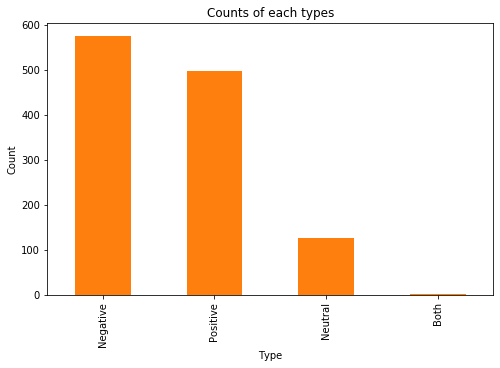

In [191]:
# count of each type 
ax = data['sentiment'].value_counts().plot(kind='bar',
                                    figsize=(8,5),
                                    color= '#ff7f0e',
                                    title="Counts of each types")
ax.set_xlabel('Type')
ax.set_ylabel('Count');

## Clean text

In [192]:
data['text'][15]

'قبل كمن سنة ... ولما توافدو اليهود من كل مناطق العالم '

In [0]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' # define arabic punctuations

def clean_text(text):
  '''
  DESCRIPTION:
  This function to clean text 
  INPUT: 
  text: string
  OUTPUT: 
  text: string after clean it
  ''' 
  text = re.sub("[a-zA-Z]", " ", text) # remove english letters
  text = re.sub('\n', ' ', text) # remove \n from text
  text = re.sub(r'\d+', '', text) #remove number
  text = re.sub(r'http\S+', '', text) # remove links
  text = text.translate(str.maketrans('','', arabic_punctuations)) # remove punctuation
  text = ' '.join([word for word in text.split() if word not in stopwords.words("arabic")]) # remove stop word
  text = re.sub(' +', ' ',text) # remove extra space
  text = text.strip() #remove whitespaces

  return text

In [0]:
# The cleaning function applied in all texts
data['text'] = data['text'].apply(clean_text)

In [195]:
data['text'][15]

'قبل كمن سنة ولما توافدو اليهود مناطق العالم'

## Create Bag of words

In [196]:
max_features = 1500
count_vector = CountVectorizer(max_features = max_features)  
X = count_vector.fit_transform(data['text']).toarray() 
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [197]:
print("most using {} words: {} ".format(max_features, count_vector.get_feature_names()))

most using 1500 words: ['أبدا', 'أبو', 'أجل', 'أحلى', 'أخوك', 'أخي', 'أرجو', 'أسامة', 'أسوأ', 'أصلا', 'أظن', 'أكتر', 'أكيد', 'ألف', 'أنك', 'أنها', 'أنو', 'أهلا', 'أول', 'أولا', 'أيام', 'إخوة', 'إزا', 'إلها', 'إنت', 'إنو', 'ابو', 'اجت', 'احد', 'احسن', 'احكي', 'احلا', 'احلى', 'احنا', 'اخ', 'اختي', 'اخر', 'اخي', 'اذا', 'ارتفع', 'ارجع', 'ارجو', 'ازا', 'اس', 'اسأل', 'اسئلة', 'اسامة', 'اسم', 'اشتغل', 'اشي', 'اصلا', 'اطول', 'اعرف', 'اعلان', 'اعمال', 'اغتصاب', 'اغلى', 'اقرا', 'اقول', 'اقوى', 'اكبر', 'اكتر', 'اكون', 'اكيد', 'ال', 'الأمر', 'الأهل', 'الا', 'الاتنين', 'الاخ', 'الاختبار', 'الاخرين', 'الازهر', 'الاسباب', 'الاعتراض', 'الاعضاء', 'الامارات', 'الامان', 'الانترنت', 'الايام', 'الباقية', 'البسيطة', 'البلد', 'البلية', 'البنات', 'البنت', 'البيت', 'التاني', 'التلفزيون', 'التنين', 'الجامعة', 'الجاي', 'الجاية', 'الجمعة', 'الجميع', 'الجميلة', 'الجنسية', 'الجيران', 'الحال', 'الحب', 'الحجاب', 'الحق', 'الحقيقة', 'الحكم', 'الحكومة', 'الحكي', 'الحلو', 'الحلوة', 'الحمد', 'الحياة', 'الخ', 'الخير', 'الد

In [198]:
print(count_vector.vocabulary_)

{'خصوصا': 475, 'لأنو': 908, 'رح': 514, 'تكون': 421, 'سهل': 548, 'لمحاولت': 1094, 'الشبكة': 141, 'مبروك': 1127, 'أخي': 5, 'يعني': 1484, 'والله': 1260, 'بتستاهل': 297, 'فعلا': 677, 'لأنك': 903, 'رجال': 512, 'يآأاساتر': 1405, 'مين': 1196, 'اذا': 38, 'كنت': 875, 'انا': 238, 'شركة': 565, 'كمان': 869, 'وحتى': 1285, 'كانوا': 800, 'أنو': 16, 'ربي': 510, 'قطة': 749, 'صغيرة': 595, 'شغلة': 568, 'حلوة': 463, 'مو': 1187, 'ونضول': 1351, 'وعملت': 1302, 'كبيرة': 804, 'بلا': 362, 'نوع': 1219, 'كله': 861, 'الدين': 119, 'هاد': 1220, 'حق': 456, 'شو': 575, 'ستي': 537, 'ريحة': 521, 'حالها': 446, 'بتمنى': 310, 'كون': 884, 'صديقة': 590, 'احلى': 32, 'منتدى': 1178, 'هنن': 1238, 'دكتور': 494, 'ناجح': 1198, 'بإذن': 268, 'الله': 191, 'ووحدة': 1364, 'السنة': 133, 'عندها': 656, 'مشكلة': 1154, 'سنة': 545, 'قبل': 709, 'معي': 1168, 'كمن': 870, 'ولما': 1317, 'اليهود': 231, 'مناطق': 1177, 'العالم': 159, 'الوحدة': 225, 'الوطنية': 227, 'كتير': 813, 'منيح': 1185, 'هالناس': 1230, 'كلمة': 859, 'هون': 1245, 'واحد': 1255, 'ونص'

In [199]:
d = pd.DataFrame(X,columns=count_vector.get_feature_names())
d

,أبدا,أبو,أجل,أحلى,أخوك,أخي,أرجو,أسامة,أسوأ,أصلا,أظن,أكتر,أكيد,ألف,أنك,أنها,أنو,أهلا,أول,أولا,أيام,إخوة,إزا,إلها,إنت,إنو,ابو,اجت,احد,احسن,احكي,احلا,احلى,احنا,اخ,اختي,اخر,اخي,اذا,ارتفع,...,يتحمل,يتحول,يتزوج,يتكحل,يثبت,يجعل,يجي,يحصل,يحكي,يخليلكم,يرحم,يروح,يسترزق,يسلم,يسلمو,يشوف,يصير,يعرف,يعطي,يعطيك,يعطيكي,يعلق,يعمل,يعملو,يعني,يعين,يعينك,يقتل,يقول,يكون,يكونو,يلا,يللي,يلى,يلي,يمكن,ينزل,يهنيك,يوصل,يوم
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [200]:
# convert classes to number
y = encoder = LabelEncoder()
y = encoder.fit_transform(data['sentiment'])
y

array([1, 3, 1, ..., 2, 1, 3])

In [0]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)


## Build classifier model

### Training model

In [202]:
# Define Gauusian Naive bayes
model = GaussianNB()

# train model
model.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

### Evaluate model

In [203]:
# Predicting the Test set results 
y_pred = model.predict(X_test) 
y_pred

array([2, 1, 2, 2, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       3, 2, 2, 1, 1, 1, 3, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 2, 2, 3, 2, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3,
       2, 1, 2, 1, 3, 1, 1, 3, 1, 2, 1, 3, 3, 2, 3, 2, 1, 1, 3, 1, 3, 3,
       1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 2, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 1, 1, 1, 1, 2,
       1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3,
       2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 2, 1, 3, 1, 3, 1, 1, 3, 3,
       3, 2, 2, 1, 3, 1, 3, 1, 3, 3, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2,
       3, 1, 1, 1, 3, 2, 3, 1, 3, 3, 2, 3, 3, 1, 1, 1, 2, 3, 3, 1])

In [204]:
print('Test model accuracy: ',accuracy_score(y_test, y_pred))

Test model accuracy:  0.4875


### Test with new review

In [205]:
# input statment
test_text = ['منتج رائع و جودته ممتازة أعجبني جدًا'] 

# convert to number
test_vector = count_vector.transform(test_text)
test_vector = test_vector.toarray()

## encodeing predict class
text_predict_class = encoder.inverse_transform(model.predict(test_vector))
print(test_text[0], 'is: ',text_predict_class[0])

منتج رائع و جودته ممتازة أعجبني جدًا is:  Positive
